# FashionMNIST 数据集

```{note}
FashionMNIST 是一个替代 MNIST 的数据集，它的的大小、格式和训练集/测试集划分与 MNIST 完全一致：60000/10000的训练测试数据划分，28x28的灰度图片<br/>
我们可以使用torchvision下载并预处理FashionMNIST
```

## 加载数据

In [1]:
from torch.utils import data
from torchvision import datasets, transforms


#@save
def load_data_fashion_mnist(batch_size, resize=None):
    """加载FashionMNIST."""
    # 定义transforms，肯定要ToTensor，Resize is optional
    trans = [transforms.ToTensor()]
    if resize:
        trans.insert(0, transforms.Resize(resize))
    trans = transforms.Compose(trans)
    # 下载数据
    train_set = datasets.FashionMNIST(root='./data', train=True, transform=trans, download=True)
    test_set = datasets.FashionMNIST(root='./data', train=False, transform=trans, download=True)
    # dataset to data_iter
    return (data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4),
            data.DataLoader(test_set, batch_size=batch_size, shuffle=False, num_workers=4))


train_iter, test_iter = load_data_fashion_mnist(batch_size=128)

## 探索

为了看一下，不重要

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE" # prevent imshow error


def get_fashion_mnist_labels(labels):
    """label to name"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]


def show_images(images, num_rows, num_columns, scale=2, titles=None):
    """
    展示图片
    """
    # 一纸多图
    _, axes = plt.subplots(num_rows, num_columns, figsize=(num_columns * scale, num_rows * scale))
    axes = axes.flatten()
    names = get_fashion_mnist_labels(titles)
    # 一个image一个ax
    for i, (ax, img) in enumerate(zip(axes, images)):
        ax.imshow(img.squeeze(0))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        if titles is not None:
            ax.set_title(names[i])
    plt.show()

torch.Size([128, 1, 28, 28])
torch.Size([128])


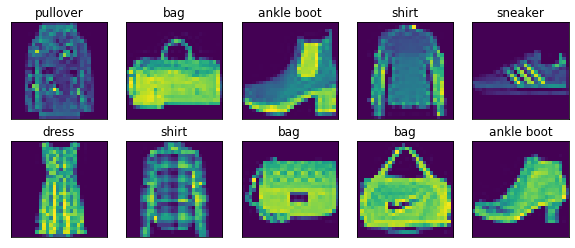

In [3]:
for X, y in train_iter:
    print(X.shape)
    print(y.shape)
    show_images(X[: 10], num_rows=2, num_columns=5, titles=y[: 10])
    break